In [6]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import os
import random
import torch
import torch.nn as nn
from custommodels import LoadDataset, ResNet50, DenseNet121, MobileNetV2
from training import ModelTrainer

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
# to reproduce
seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

In [8]:
db = "HAM"
root = f"../../dataset/CAI 2025/{db}/"
df_train = pd.read_csv(f"{root}/dataframe/df_distance_train.csv")
df_valid = pd.read_csv(f"{root}/dataframe/df_distance_valid.csv")
df_test = pd.read_csv(f"{root}/dataframe/df_distance_test.csv")

loader = LoadDataset(label="label", batch_size=16)
train_loader, valid_loader, test_loader = loader.create_dataloaders(df_train, df_valid, df_test)

Width: 200 Height: 150


# MobileNet

In [9]:
models = ["RES", "DENSE", "MOBILE"]

model_save_directory = f"{root}models/{models[2]}/"
if not os.path.exists(model_save_directory):
    os.makedirs(model_save_directory)
    print(f"{model_save_directory} created.")
else:
    print(f"{model_save_directory} aready exist.")
        
df_valid_filepath = f"{root}dataframe/df_valid_{models[2]}.csv"
df_test_filepath = f"{root}dataframe/df_test_{models[2]}.csv"

../../dataset/CAI 2025/HAM/models/MOBILE/ created.


Validation Accuracy: 0.0654 | Loss: 2.1593 | F1: 0.0378
Validation Accuracy: 0.3621 | Loss: 1.8766 | F1: 0.1423
Validation Accuracy: 0.5774 | Loss: 1.5644 | F1: 0.1940
Validation Accuracy: 0.6484 | Loss: 1.3461 | F1: 0.2122
Validation Accuracy: 0.6863 | Loss: 1.1734 | F1: 0.2466
Validation Accuracy: 0.6948 | Loss: 1.0757 | F1: 0.2428
Validation Accuracy: 0.7023 | Loss: 1.0232 | F1: 0.2424
Validation Accuracy: 0.7008 | Loss: 0.9776 | F1: 0.2283
Validation Accuracy: 0.7038 | Loss: 0.9453 | F1: 0.2313
Validation Accuracy: 0.7048 | Loss: 0.9088 | F1: 0.2247
Validation Accuracy: 0.7038 | Loss: 0.8928 | F1: 0.2190
Validation Accuracy: 0.6993 | Loss: 0.8666 | F1: 0.2082
Validation Accuracy: 0.6973 | Loss: 0.8639 | F1: 0.2053
Validation Accuracy: 0.7028 | Loss: 0.8452 | F1: 0.2197
Validation Accuracy: 0.7063 | Loss: 0.8356 | F1: 0.2311
Validation Accuracy: 0.6978 | Loss: 0.8346 | F1: 0.2114
Validation Accuracy: 0.7038 | Loss: 0.8244 | F1: 0.2189
Validation Accuracy: 0.7038 | Loss: 0.8127 | F1:

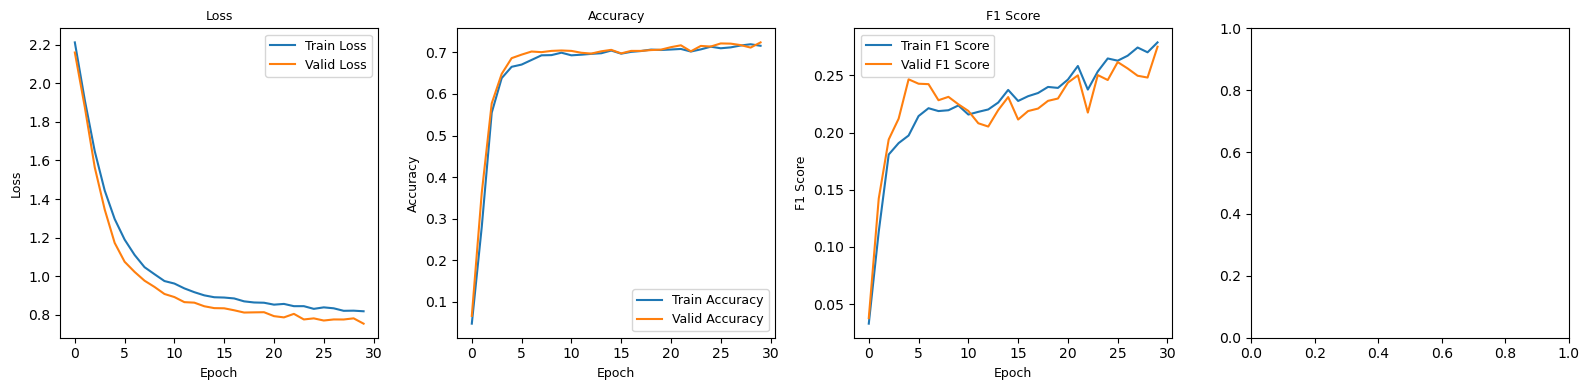

In [10]:
num_class = 8
num_epochs = 30
lr = 1e-6

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MobileNetV2(num_class).to(device)
trainer = ModelTrainer()
best_val_file = trainer.train(model, train_loader, valid_loader, model_save_directory, num_epochs=num_epochs, lr=lr)

In [12]:
model = MobileNetV2(num_class).to(device)
model.load_state_dict(torch.load(best_val_file))
test_predictions, test_outputs = trainer.evaluate(model, valid_loader)
df_valid["pred"] = test_predictions
df_valid["proba"] = test_outputs
df_valid.to_csv(df_valid_filepath, index=False)

Number of true labels: 2002, Number of predictions: 2002
              precision    recall  f1-score   support

           0       0.77      0.97      0.86      1341
           1       0.57      0.13      0.21       222
           2       0.42      0.38      0.40       219
           3       0.00      0.00      0.00        23
           4       0.61      0.33      0.43       103
           5       0.00      0.00      0.00        29
           6       1.00      0.02      0.03        65

    accuracy                           0.72      2002
   macro avg       0.48      0.26      0.28      2002
weighted avg       0.69      0.72      0.66      2002



/home/kuniko/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kuniko/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kuniko/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [13]:
test_predictions, test_outputs = trainer.evaluate(model, test_loader)
df_test["pred"] = test_predictions
df_test["proba"] = test_outputs
df_test.to_csv(df_test_filepath, index=False)

Number of true labels: 2003, Number of predictions: 2003
              precision    recall  f1-score   support

           0       0.77      0.97      0.86      1341
           1       0.47      0.11      0.18       222
           2       0.47      0.40      0.43       220
           3       0.00      0.00      0.00        23
           4       0.56      0.37      0.44       103
           5       0.00      0.00      0.00        28
           6       0.75      0.05      0.09        66

    accuracy                           0.73      2003
   macro avg       0.43      0.27      0.29      2003
weighted avg       0.67      0.73      0.67      2003



/home/kuniko/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kuniko/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kuniko/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
